# Lasso

Lasso, or _Least Absolute Shrinkage_, or l1 penalty, adds an additional term to the cost function, just like ridge regression. So now instead of minimizing $J(w) = ||Xw-y||^2$, we now minimize $J(w) = ||Xw-y||^2 + \alpha \sum_{i=1}^n |w_i|$

Or.

$$J(w) = MSE(w) + \alpha \sum_{i=1}^n |w_i|$$


## What is the distinct difference from Ridge Regression?

Only L1 regularization allows for feature selection. To see why this is the case, consider two weight vectors and assume the produce the same log loss.

* $w_1 = (1,0)$
* $w_2 = (.5,.5)$

**L1 Regularization (Lasso)**
* $||w_1||^1 = \sum_{j=1}^n |w_j| = 1 + 0 = 1$
* $||w_1||^1 = \sum_{j=1}^n |w_j| = .5 + .5 = 1$


**L2 Regularization (Ridge)**
* $||w_2||^2 = \sum_{j=1}^n |w_j| = 1^2 + 0^2 = 1$
* $||w_2||^2 = \sum_{j=1}^n |w_j| = .5^2 + .5^2 = .5$


With L1 regularization, the same penality is produced despite similiar weights - unlike with l2 regularization. With l2 regularization, small weights are favored _for all weights_. This is because $|w_j|^2 < 1$ when $w_j < 1$, and when $|w_j|^2 > 1$ the penality EXPLODES due to the square term. Therefore from its perspective, having _all_ the weights be small is a more effective strategy then having some of the weights be small, and a few weights be really large. An effective balance would be to have all the weights be small in order to compensate for a few very large weights.

With l1 regularization, this effect is dramatically reduced. For example, if a weight is 5 its l1 penality would be 5, where as with l2 regularization, it would be 25 - which takes up space for 5 other weights just as large. Therefore, it allows for both small and large weights equally - which allows for some 0 and other weights can be large. It is for this reason that l1 regularization can be used for parameter selection.

For this reason, Lasso is preferred for its tendency to eliminate parameters and produce a sparse model with a few nonzero feature weights.


## Example - Lasso Weights as a Function of Alpha

100% (10000 of 10000) |##################| Elapsed Time: 0:00:03 Time:  0:00:03


Text(0.5,1,'Coefficient value change as a function of alpha - Lasso')

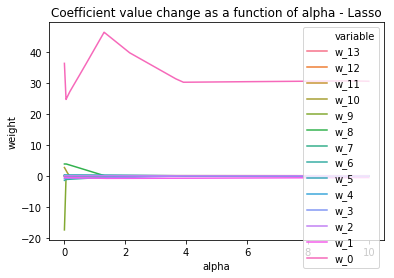

In [5]:
from sklearn import linear_model
from sklearn.datasets import load_boston
from progressbar import ProgressBar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


boston = load_boston()
X, y = boston.data, boston.target

w_by_alpha = []
bar = ProgressBar()
for a in bar(np.arange(10, .00001, -.001)):
    reg = linear_model.Lasso(alpha=a)
    reg.fit(X, y)
    coef = list(reg.coef_)
    coef.extend([reg.intercept_]+[a])
    w_by_alpha.append(coef)

columns = [f'w_{i}' for i in range(X.shape[1], -1, -1)] + ['a']
w_by_alpha_df = pd.DataFrame(w_by_alpha, columns=columns)

w_by_alpha_df = w_by_alpha_df.melt(id_vars=['a'])
sns.lineplot(x="a", y="value", hue="variable", data=w_by_alpha_df)
plt.xlabel('alpha')
plt.ylabel('weight')
plt.title('Coefficient value change as a function of alpha - Lasso')

We also observe that a relatively high quantity of weights converge towards zero, each with a relatively small alpha. So where as the alpha parameter in `Ridge` controlled the degree to which coefficients would tend towards zero, the alpha parameter in Lasso would control the degree of sparsity in a model. This reiterates the fact that `Lasso` yields sparse models.

## LassoCV

Like with `RidgeCV` we can alpha tune using `LassoCV`. It can be should in both cases, however, that the 'optimal' alpha score yields significantly accuracy scores on different subsets of the data. For this reason, it should not be trusted very much.

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
alphas = np.logspace(-4, -0.5, 30)
lasso_cv = linear_model.LassoCV(alphas=alphas, random_state=0)
lasso_cv.fit(X_train, y_train)
print(f"alpha: {lasso_cv.alpha_}, score: {lasso_cv.score(X_test, y_test)}")

alpha: 0.011264816923358867, score: 0.7240674802448815


## LassoLarsCV

LassoLarsCV solves the same problem as Lasso but uses a different algorithm (LARS) to do so. Rather than explicitly providing the alphas, the algorithm finds it itself - which adds to its stability.

[TODO]

In [12]:
lasso_cv = linear_model.LassoLarsCV()
lasso_cv.fit(X_train, y_train)
print(f"alpha: {lasso_cv.alpha_}, score: {lasso_cv.score(X_test, y_test)}")

alpha: 0.0035909182138314927, score: 0.7181183524588123


## LassoLarsIC

Rather than using CV for model selection of the regularization parameter, LassoLarsIC uses Akaike Information Criterion (AIC) and Bayes Information Criterion. This is a cheaper alternative to CV since in CV, the regularization path is computed once, where as with LarsIC, it is computed once.

Cons:
* Relies on proper estimation of the degrees of freedom.
* Derived for large samples.
* Assume the model is correct.

[TODO]

## Other 

```python
# lass regression using gradient descent
SGDRegressor(penalty="l1")
```
